### Table of Contents
- Intro
- Nowcast
- Using Nowcast to improve Forecast



## Introduction


Forecasting in the presence of reporting delay: simulation study. Given some delayed data, can we use the method described in Gibson, Reich, Ray to improve forecasts based on predicted values of nowcasting. 

Strategy


- Generate data for t=0..100
- Delay data from t=90..100 according to fixed delay proportions (that is artificially scale down the data)
- Fit delay model to simulated delayed data
- Generate nowcasts for t0=90..100
- Retrain process model on mean predicted nowcasts (t=90..100)
- Forecast t=100-110 using updated process model and original process model 
- Compare MSE

### Notation 

We define $y_t$ as an observed value of this incidence in time interval $t$ from our time series $\{y_1, y_2, y_3, \dots\, y_t, \dots, y_T\}$.
We assume that these observations are draws from random variables $Y_1, Y_2, Y_3, \dots, Y_t, \dots, Y_T$, whose probability distributions can be thought of as a function of $t$, prior values of $y$ represented as $y_{1:t}$, and other covariates $x_t$.
We use $T$ throughout to refer to the total number of time points in the time-series and $t$ to refer to a specific time point relative to which a forecast is generated.


For forecasts of the time-series values itself, \ie when a target is defined to be a past or future value of the time-series $Y_{t+k}$, we use a special nomenclature, referring to them as `k-step-ahead` forecasts.  
We define $Z_{i|t}$ as a random variable for target $i$ positioned relative to time $t$. For example, in the infectious disease context, $Z_{i|t}$ could be:

 - incidence at time $t$, or $Y_t$,
 - incidence at time $t+k$ either in the future or past relative to time $t$, or $Y_{t+k}$, where $k$ is a positive or negative integer,
 - peak incidence within some period of time or season, or $\max_t (Y_t)$ where $t$ are defined to be within a season,
    \item the time at which a peak occurs within some season, or $\{ t': Y_{t'} = \max_t (Y_t) \} $
 - a binary indicator of whether incidence at time $t+k$ is above a specified threshold $C$, or $\mathds{1} \{Y_{t+k}>C\}$.
\end{itemize}


A forecast must provide {\em quantitative and probabilistic} information about an outcome.
In the context of this notation, a forecast can be represented as a predictive density function for a target, or $f_{z_{i|t}}(z|y_{1:t}, t, x_{t})$.
The form of this density function will depend on the type of variable that $Z$ is, and it could be derived from a known parametric distribution or specified directly.

In our initial experiments we are mostly concerned with the following distribution

$$f_{Y_{t+k}|i}(Y_t | y_{1:t},t,x_t)$$

that is, $k-step$ ahead forecast relative to time $t$.


To enable clear definitions for forecasting in real-time, forecasts must be associated with a specific time $t$.
In our database infrastructure, we refer to this time as a {\tt timezero}.
This specific time $t$ represents the point relative to which targets are defined.
For example, if a forecast is associated with week 45 in 2013, then a `1-step-ahead' forecast would be associated with incidence in week 46 of 2013 and a `3-step-ahead' forecast would be associated with week 48.
This {\tt timezero} is not an intrinsic feature of a project or dataset, and is more or less arbitrarily defined or named by the data analyst or project organizers.
For example, in the project above, if we defined a timezero as week 44 in 2013 then a `2-step-ahead' forecast would be associated with incidence in week 46, same as a `1-week-ahead' forecast from week 45.

However, a second important date further refines our notion of what constitutes a forecast. 
We define a date $d$ as a {\tt data-version-date}. 
Taken together, a $(t,d)$ pair uniquely define a forecast setting.
Specifically, a forecast for $(t,d)$ represents forecasts for targets relative to date $t$ using data available at date $d$. 

## Simulation Study, fixing delay proportions and generating nowcast

In order to apply the delay we simply take 

$$N_{t,d} = \sum_{i=0}^dp_i*N_{t,\infty}$$

## Using nowcast to improve forecast




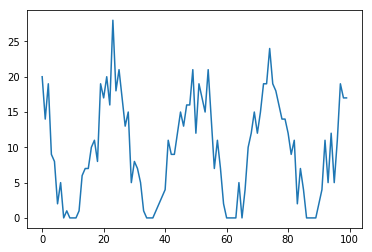

In [13]:
from scipy.special import expit
import numpy as np
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

scale_factor =1 
variance_level_results = []

cutoff = 100
D = 10


arr_list = np.zeros(260)
        # iterate over season  
for s in range(10):
        #iterate over biweek per season
        for t in range(26):
            season_effect = np.random.choice([10,10,10], p = [0.2, 0.6, 0.2])
            e_y = season_effect*np.cos(10*(t+np.pi)/(13*np.pi)) + season_effect
            arr_list[(s-1)*26+t] = np.random.poisson(e_y) 

ts = arr_list[:cutoff]


plt.plot(ts)
plt.show()

p_vec = np.random.dirichlet(np.ones(D),size=1)[0]

for t in ts[:50]:
    removal_cases = np.random.poisson(5)
    removal_cases = removal_cases*p_vec
    

        
        

In [1]:

#variance_level_results = np.array(variance_level_results)
#
#np.save("variance_level_results_2",variance_level_results)
#print (variance_level_results)

NameError: name 'np' is not defined

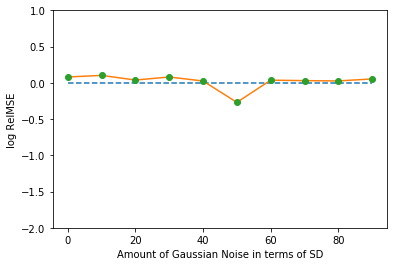

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#variance_level_results = np.load("variance_level_results_2.npy")
variance_level_results = np.array(variance_level_results)
variance_level_results = variance_level_results.reshape((10,1))
mean_var = np.log(np.mean(variance_level_results,axis=1))
lower_ci = np.log(np.percentile(variance_level_results,q=2.25,axis=1))
upper_ci = np.log(np.percentile(variance_level_results,q=97.5,axis=1))
plt.plot(np.arange(0,100,10),np.repeat(0,10),linestyle='--')
plt.plot(np.arange(0,100,10),mean_var)
plt.plot(np.arange(0,100,10),mean_var,'o')
plt.fill_between(np.arange(0,100,10),lower_ci,upper_ci,alpha=.1)
plt.ylim(-2,1)
plt.xlabel("Amount of Gaussian Noise in terms of SD")
plt.ylabel("log RelMSE")
plt.show()